In [2]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.10/ (Recommended version – 3.10).
# The Python Tutorial (python3.10): https://docs.python.org/3.10//tutorial/index.html

# Load Modules ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
#       About: https://matplotlib.org/
#       Using Matplotlib (user guide): https://matplotlib.org/stable/users/index
#       Plot types: https://matplotlib.org/stable/plot_types/index
#       Tutorials: https://matplotlib.org/stable/tutorials/index
#       Examples: https://matplotlib.org/stable/gallery/index
#       API Reference: https://matplotlib.org/stable/api/index

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.23.5
pandas version:  1.5.3
seaborn version: 0.12.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) - [Ordinary Least Squares (OLS) Method](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

Equation of line -
`y = mx + c`

![mass-luminosity.gif](https://www.astronomynotes.com/starprop/mass-luminosity.gif)

Source: https://www.astronomynotes.com/starsun/s8.htm

## On sample dataset (Salary-Prediciton-based-on-Years-of-Experience)

### load and analysis dataset

source: https://docs.google.com/spreadsheets/d/1RL6e_ajdGaM9tL5UQz8vdBrYpKtlswZE/edit?usp=drive_link&ouid=113243900180498872880&rtpof=true&sd=true

In [1]:
# Source: https://docs.google.com/spreadsheets/d/1RL6e_ajdGaM9tL5UQz8vdBrYpKtlswZE/edit?usp=drive_link&ouid=113243900180498872880&rtpof=true&sd=true
!gdown "1RL6e_ajdGaM9tL5UQz8vdBrYpKtlswZE"

Downloading...
From: https://drive.google.com/uc?id=1RL6e_ajdGaM9tL5UQz8vdBrYpKtlswZE
To: /content/salary_data4regression.xlsx
100% 30.2k/30.2k [00:00<00:00, 64.7MB/s]


In [7]:
data=pd.read_excel('salary_data4regression.xlsx')                               # load data
data.head()                                                                     # head of data

,experience (x),salary (y)
0,1,32472
1,2,39700
2,3,55597
3,4,61001
4,5,69000


In [8]:
data.tail()                                                                     # tail of data

,experience (x),salary (y)
5,6,78345
6,7,86001
7,8,96123
8,9,101700
9,10,120000


In [12]:
data.shape                                                                      # see shape of data

(10, 2)

In [13]:
data.columns                                                                    # see column names

Index(['experience (x)', 'salary (y)'], dtype='object')

In [11]:
data.info()                                                                     # see data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   experience (x)  10 non-null     int64
 1   salary (y)      10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [15]:
data.isna().sum()                                                               # see null value counts (numerical)

experience (x)    0
salary (y)        0
dtype: int64

### plot data

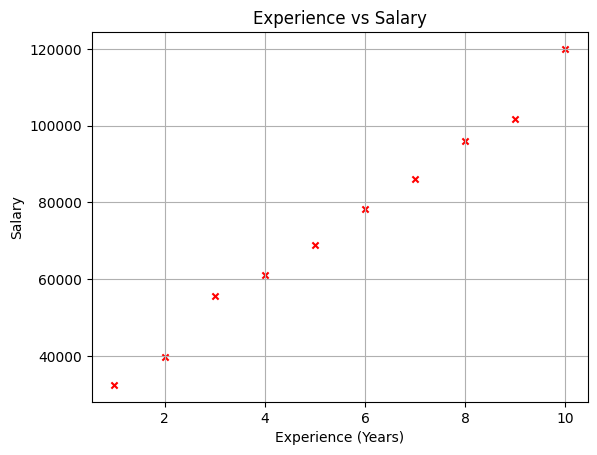

In [16]:
data.plot.scatter(x='experience (x)',y='salary (y)',marker='x',color='r')       # or, plot using pandas
#plt.scatter(data['YearsExperience'],data['Salary'],marker='x',color='r')       # plot using pyplot
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary')                                               # add plot title
plt.show()                                                                      # make show plot

### make apply Linear Regression Manually

In [17]:
# As, linear regression equation -> y = m * X + c ; where , y -> salary (y), x -> experience (x), m -> slope (coef_), c -> intercept
# So, salary (y) = m *  experience (x) + c
# m = covariance / variances ; where , variances = (X - x_mean)^2 , and covariance = (X - x_mean) * (y - y_mean)
# c = y_mean - m * x_mean
# make calculate variances for inputs - X
data['experience (x) variances']=np.square(data['experience (x)']-data['experience (x)'].mean())# calculate variances - (X - x_mean)^2
# covariance = (X - x_mean) * (y - y_mean)
data['covariance']=np.multiply(data['experience (x)']-data['experience (x)'].mean(),data['salary (y)']-data['salary (y)'].mean())# calculate covariance
coefficient=np.sum(data['covariance'])/np.sum(data['experience (x) variances']) # calculate slope (m) / coefficient
intercept=data['salary (y)'].mean()-coefficient*data['experience (x)'].mean()   # calculate intercept
# make manual prediction - y_predicted = m * YearsExperience + c
data['y_predicted_manually']=coefficient*data['experience (x)']+intercept       # make manual prediction

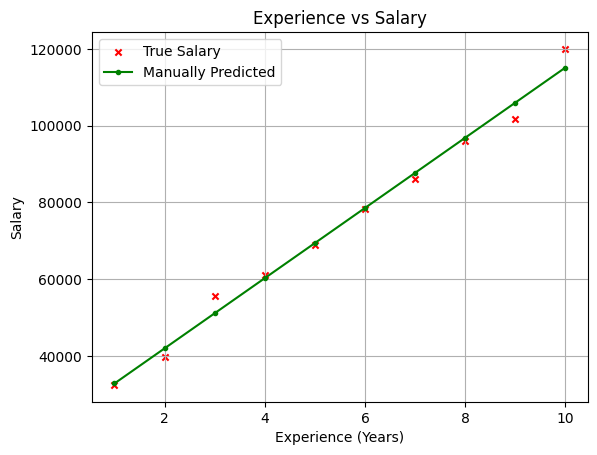

In [18]:
# make plot results
ax=data.plot.scatter(x='experience (x)',y='salary (y)',marker='x',color='r')    # make plot true value
data.plot(x='experience (x)',y='y_predicted_manually',marker='.',color='g',ax=ax)# make plot predicted values
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary'),plt.legend(['True Salary','Manually Predicted'])# add plot title and legend
plt.show()                                                                      # make plot show

### make apply Linear Regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [19]:
from sklearn.linear_model import LinearRegression                               # load LinearRegression class

lReg=LinearRegression()                                                         # make model (object) of linear regression class
# As, linear regression equation -> y = m * X + c ; where , y -> salary (y), x -> experience (x), m -> slope (coef_), c -> intercept
# So, salary (y) = m * experience (x) + c
# make model train (calaculate features) - find value of m and c
#lReg.fit(data['experience (x)'].values.reshape(-1,1),data['salary (y)'])       # make fit data - Xtrain and ytrain # or
lReg.fit(data[['experience (x)']],data['salary (y)'])                           # make fit data
# print m and c
print('Slope:',lReg.coef_)                                                      # predicted slope / coefficient
print('Intercept:',lReg.intercept_)                                             # predicted intercept

Slope: [9143.8]
Intercept: 23702.999999999985


In [20]:
# compair slope / coefficient and intercept (by sklearn.linear_model.LinearRegression) with manually predicted slope / coefficient and intercept
print('Slope (by sklearn.linear_model.LinearRegression)    :',lReg.coef_)       # predicted slope / coefficient (by by sklearn.linear_model.LinearRegression)
print('Intercept (by sklearn.linear_model.LinearRegression):',lReg.intercept_)  # predicted intercept (by by sklearn.linear_model.LinearRegression)
print('Slope (manually)                                    :',coefficient)      # predicted slope / coefficient (by by sklearn.linear_model.LinearRegression)
print('Intercept (manually)                                :',intercept)        # predicted intercept (by by sklearn.linear_model.LinearRegression)
print('Difference (in slope)                               :',lReg.coef_[0]-coefficient)# difference between coefficients
print('Difference (in intercept)                           :',lReg.intercept_-intercept)# difference between intercepts

Slope (by sklearn.linear_model.LinearRegression)    : [9143.8]
Intercept (by sklearn.linear_model.LinearRegression): 23702.999999999985
Slope (manually)                                    : 9143.8
Intercept (manually)                                : 23703.0
Difference (in slope)                               : 1.8189894035458565e-12
Difference (in intercept)                           : -1.4551915228366852e-11


In [21]:
# make prediction for y (y-predict) by built-in method
data['y_predicted']=lReg.predict(data[['experience (x)']])                      # make prediction - by built-in method
# as `lReg.predict` do nothing new , just -> Salary = m * YearsExperience + c ; to prove this calculate manually y_predicted
y_predicted_manually=lReg.coef_*data['experience (x)']+lReg.intercept_          # manually predict y
# so, as `lReg.predict` uses y = m * X + c ; thus, `y_predicted` must be equal to `y_predicted_manually` , make check
print('All same:',np.allclose(y_predicted_manually,data['y_predicted']))        # np.allclose -> Returns True if two arrays are element-wise
# equal within a tolerance. The tolerance values are positive, typically very small numbers.

All same: True


In [22]:
# Is prediction by sklearn.linear_model.LinearRegression and by manual (total) calculation
print('All same:',np.allclose(data['y_predicted_manually'],data['y_predicted']))# np.allclose -> Returns True if two arrays are element-wise
# equal within a tolerance. The tolerance values are positive, typically very small numbers.

All same: True


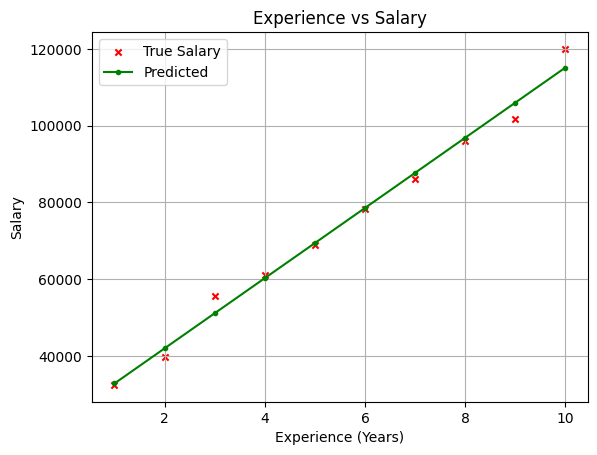

In [23]:
# make plot results
ax=data.plot.scatter(x='experience (x)',y='salary (y)',marker='x',color='r')    # make plot true value
data.plot(x='experience (x)',y='y_predicted',marker='.',color='g',ax=ax)        # make plot predicted values
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary'),plt.legend(['True Salary','Predicted'])       # add plot title and legend
plt.show()                                                                      # make plot show

### Evaluate model results


* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)

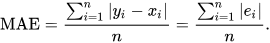

It is thus an arithmetic average of the absolute errors |`e`<sub>i</sub>| = |y<sub>i</sub> - x<sub>i</sub>| is the prediction and the true value.

* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

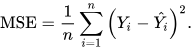

In other words, the MSE is the mean image.png of the squares of the errors 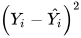 . This is an easily computable quantity for a particular sample (and hence is sample-dependent).

In [24]:
data.head()                                                                     # see final results

,experience (x),salary (y),experience (x) variances,covariance,y_predicted_manually,y_predicted
0,1,32472,20.25,186848.55,32846.8,32846.8
1,2,39700,12.25,120028.65,41990.6,41990.6
2,3,55597,6.25,45992.25,51134.4,51134.4
3,4,61001,2.25,19489.35,60278.2,60278.2
4,5,69000,0.25,2496.95,69422.0,69422.0


In [25]:
data.tail()                                                                     # see tail of data

,experience (x),salary (y),experience (x) variances,covariance,y_predicted_manually,y_predicted
5,6,78345,0.25,2175.55,78565.8,78565.8
6,7,86001,2.25,18010.65,87709.6,87709.6
7,8,96123,6.25,55322.75,96853.4,96853.4
8,9,101700,12.25,96971.35,105997.2,105997.2
9,10,120000,20.25,207027.45,115141.0,115141.0


In [26]:
# calculate absolute error (difference)
data['absolute_error']=np.abs(data['salary (y)']-data['y_predicted'])           # absolute error = |y_true - y_predicted|
# calculate squared error (difference)
data['squared_error']=np.square(data['salary (y)']-data['y_predicted'])         # squared error = (y_true - y_predicted)^2
# make calculate and print mean absolute error and mean squared error
print('Mean Absolute Error (MAE):',data['absolute_error'].mean())               # print mean absolute error
print('Mean Squared Error (MAE):',data['squared_error'].mean())                 # print mean squared error

Mean Absolute Error (MAE): 2008.8799999999974
Mean Squared Error (MAE): 7158000.5600000005


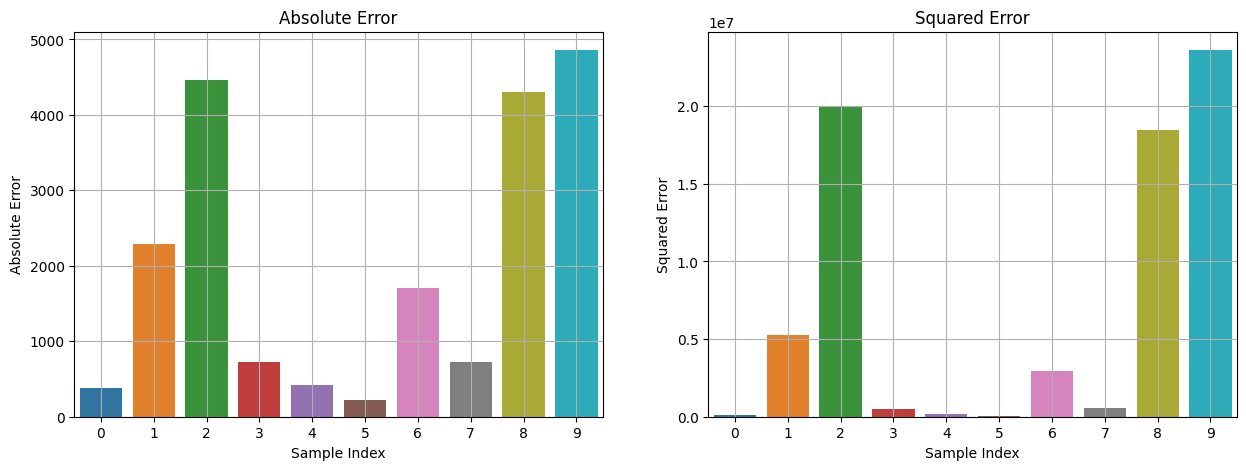

In [27]:
plt.figure(figsize=(15,5))                                                      # make plot figure and set figure size - 15 inches along x axis and 5 along y axis
plt.subplot(1,2,1)                                                              # make subplot - 1 row, 2 columns and index -> 1
sns.barplot(data=data,x=data.index,y='absolute_error')                          # make plot absolute error sample wise
plt.grid(),plt.xlabel('Sample Index'),plt.ylabel('Absolute Error')              # add grid and axis labels
plt.title('Absolute Error')                                                     # add title to plot
plt.subplot(1,2,2)                                                              # make subplot - 1 row, 2 columns and index -> 2
sns.barplot(data=data,x=data.index,y='squared_error')                           # make plot squared error sample wise
plt.grid(),plt.xlabel('Sample Index'),plt.ylabel('Squared Error')               # add grid and axis labels
plt.title('Squared Error')                                                      # add title to plot
plt.show()                                                                      # make plot show

# What More ?

* [Underfitting vs. Overfitting ?](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* More on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html) - Regularization (penalty) - [Ridge Regression and Classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), and [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

# References

* [The Python Tutorial](https://docs.python.org/3.10/tutorial/index.html)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [Matplotlib's Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
* [Pyplot - image tutorial](https://matplotlib.org/stable/tutorials/images.html#sphx-glr-tutorials-images-py)
* [Matplotlib - All Tutorials](https://matplotlib.org/stable/tutorials/index.html)
* [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [10 Minutes to Pandas (Pandas, official tutorial)](https://pandas.pydata.org/docs/user_guide/10min.html)
* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)